<a href="https://colab.research.google.com/github/PsorTheDoctor/statistical-ml/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistical ML final project
##Handwritten digit recognition: 95% accuracy

In [ ]:
%pip install -q pyreadr
!git clone https://github.com/PsorTheDoctor/statistical-ml.git
%cd statistical-ml/

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from utils.load_data import *

In [31]:
def build_model():
  model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(18, 18, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  
  plot_model(model, to_file='model.png', show_shapes=True)
  return model

def eval_model(model):
  model.evaluate(X_test, y_test, verbose=2)
  y_pred = np.argmax(model.predict(X_test), axis=1)

  pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), 
                    pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
  misclassified = pred[pred['y_test'] != pred['y_pred']]

  plt.figure(figsize=(14, 6))
  for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(np.fliplr(X_test[j]), cmap='gray')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), 
              color='black', fontsize=10)
  plt.show()

In [ ]:
# All-persons-in dataset
X_train, y_train, X_test, y_test = load_2d_all_persons_in_dataset(
    n_persons=12, split_ratio=0.8, shuffle=True, verbose=True
)
X_train /= 255.
X_test /= 255.

model = build_model()
history_all_in = model.fit(
    X_train, y_train, validation_split=0.2, epochs=20, batch_size=32
)

150/150 - 1s - loss: 0.1937 - accuracy: 0.9533 - 532ms/epoch - 4ms/step
150/150 [==============================] - 1s 4ms/step


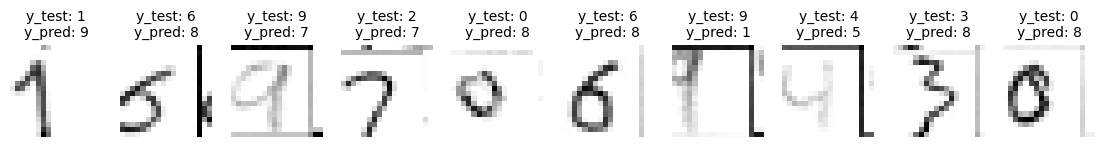

In [40]:
eval_model(model)

In [ ]:
# Disjunct dataset
X_train, y_train, X_test, y_test = load_2d_disjunct_dataset(
    n_persons=12, split_ratio=0.8, shuffle=True, verbose=True
)
X_train /= 255.
X_test /= 255.

model = build_model()
history_disjunct = model.fit(
    X_train, y_train, validation_split=0.2, epochs=20, batch_size=32
)

250/250 - 1s - loss: 0.1799 - accuracy: 0.9555 - 906ms/epoch - 4ms/step
250/250 [==============================] - 1s 4ms/step


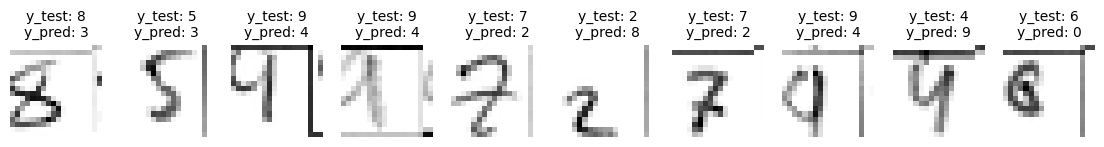

In [42]:
eval_model(model)

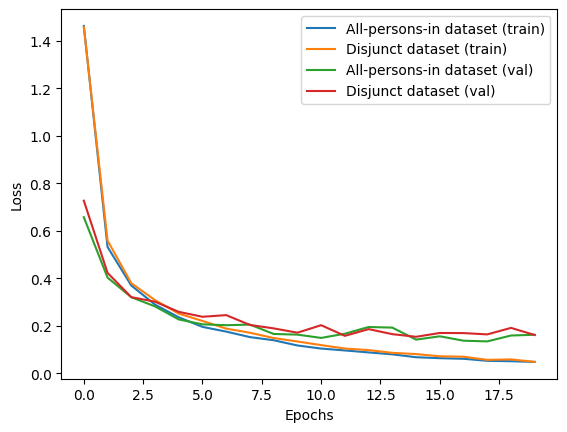

In [52]:
plt.plot(history_all_in.history['loss'], label='All-persons-in dataset (train)')
plt.plot(history_disjunct.history['loss'], label='Disjunct dataset (train)')
plt.plot(history_all_in.history['val_loss'], label='All-persons-in dataset (val)')
plt.plot(history_disjunct.history['val_loss'], label='Disjunct dataset (val)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

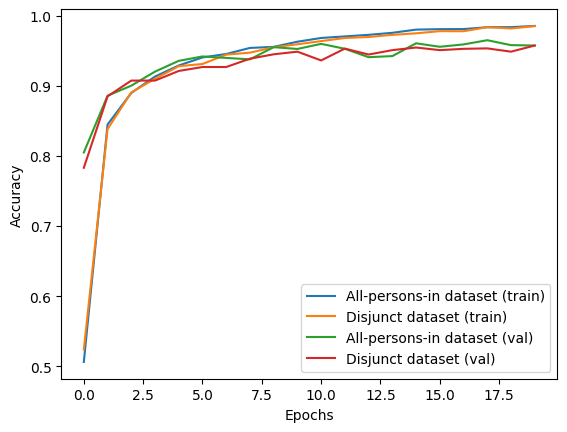

In [54]:
plt.plot(history_all_in.history['accuracy'], label='All-persons-in dataset (train)')
plt.plot(history_disjunct.history['accuracy'], label='Disjunct dataset (train)')
plt.plot(history_all_in.history['val_accuracy'], label='All-persons-in dataset (val)')
plt.plot(history_disjunct.history['val_accuracy'], label='Disjunct dataset (val)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()